# Clustering Jerarquico

In [15]:
# imports
from matplotlib import pyplot as plt
import numpy as np

In [17]:
# setups
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suprime notación científica en los tipos de dato float

### Generación de los datos de ejemplo

In [20]:
from sklearn.datasets import make_blobs

In [22]:
# make_blobs retorna una tupla (puntos, centroide al que pertenece)
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.8, random_state=101)

Text(0.5, 1.0, 'Datos de Ejemplo')

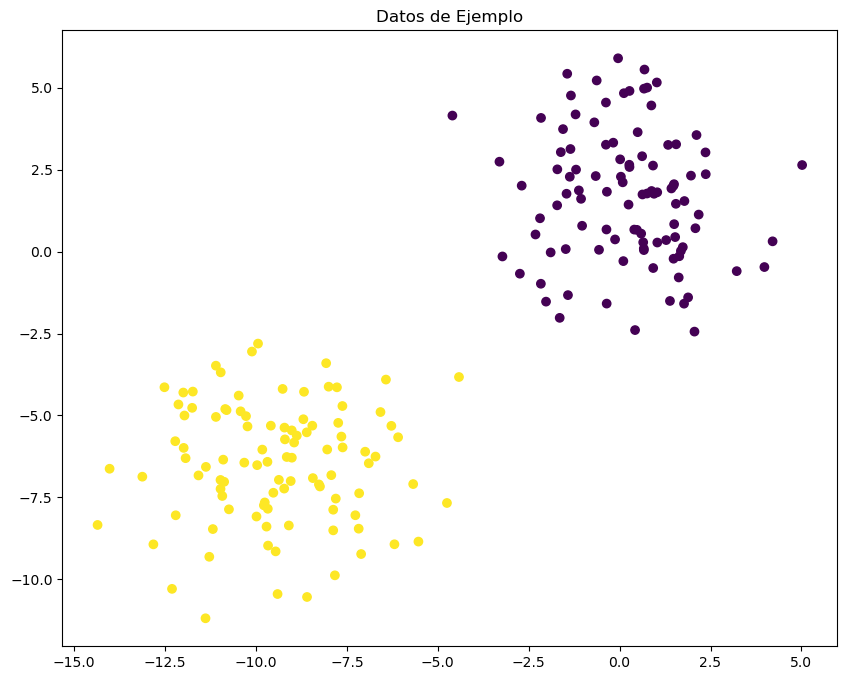

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Datos de Ejemplo')

### Realizando la Clusterización Jerárquica

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hc = AgglomerativeClustering(metric='euclidean', linkage='ward')

In [31]:
y_hc = hc.fit_predict(X)

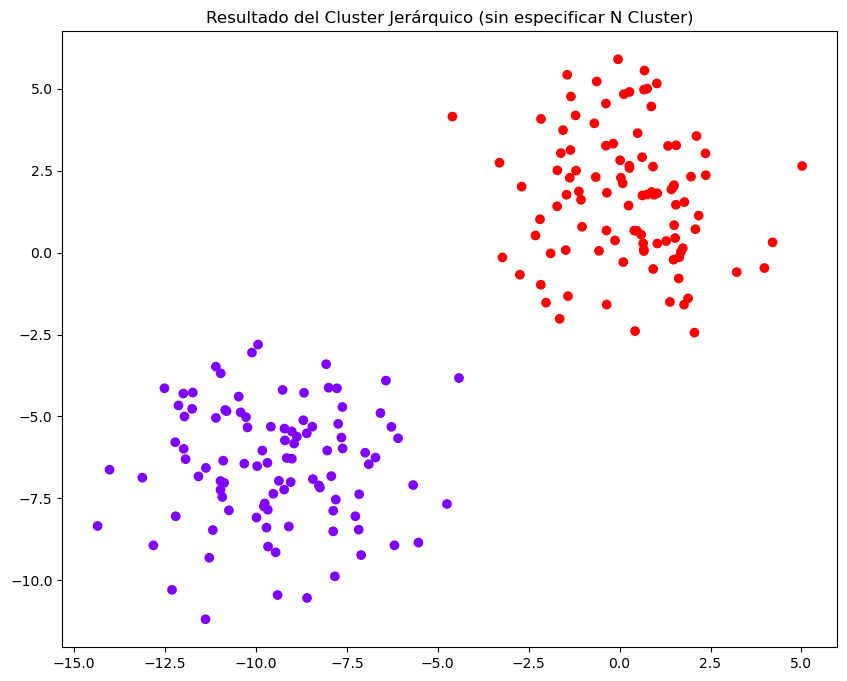

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.title('Resultado del Cluster Jerárquico (sin especificar N Cluster)')
plt.show()

### Graficando un Dendrograma

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward')

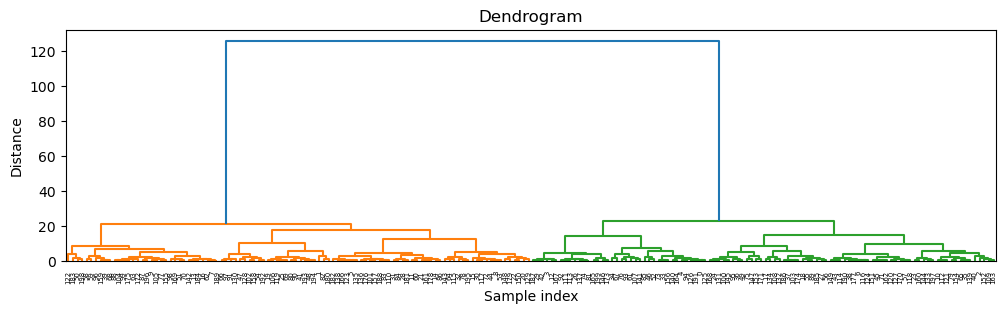

In [39]:
# Plot del dendrograma
plt.figure(figsize=(12, 3))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### Personalizaciones al Dendrograma

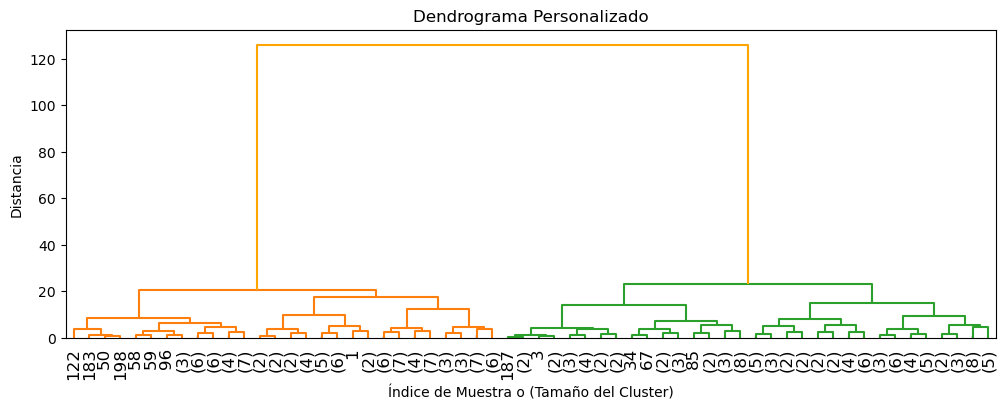

In [42]:
# Customizar el dendrograma
plt.figure(figsize=(12, 4))
dendrogram(
    Z,
    #truncate_mode='lastp',  # Mostrar solo los últimos p clusters combinados
    #truncate_mode= None,  # Muestra todo el dendrograma sin truncar
    truncate_mode='level',  # Mostrar solo los nodos hasta un nivel específico
    p=5,  # Limitar el dendrograma a 5 niveles
    leaf_rotation=90.,  # Rotar las etiquetas del eje x
    leaf_font_size=12.,  # Tamaño de fuente para las etiquetas del eje x
    show_contracted=True,  # Para obtener una impresión de distribución en ramas truncadas
    above_threshold_color='orange'  # Color para las ramas por encima del umbral
)
plt.title('Dendrograma Personalizado')
plt.xlabel('Índice de Muestra o (Tamaño del Cluster)')
plt.ylabel('Distancia')
plt.show()

### Seleccionando la cantidad de clusters

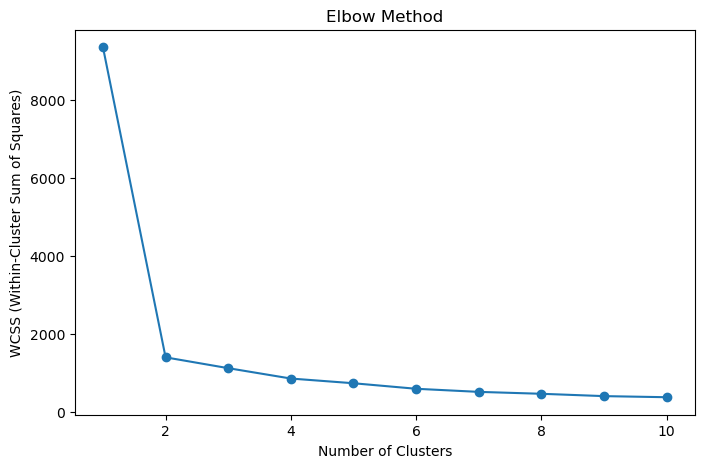

In [46]:
from sklearn.cluster import KMeans

# Usando en método del codo para encontrar el número óptimo de clusters
wcss = []

# Prueba distintos números de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficando el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

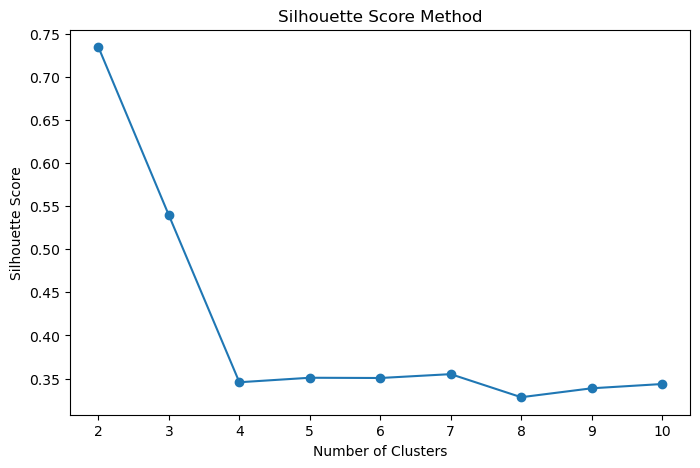

In [48]:
from sklearn.metrics import silhouette_score

# Calcular el scores de la silueta para diferentes números de clusters
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=101)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Graficando el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Obteniendo el cluster

In [51]:
# Probemos con un cluster = 8

hc = AgglomerativeClustering(n_clusters = 8, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

### Visualizando el Cluster

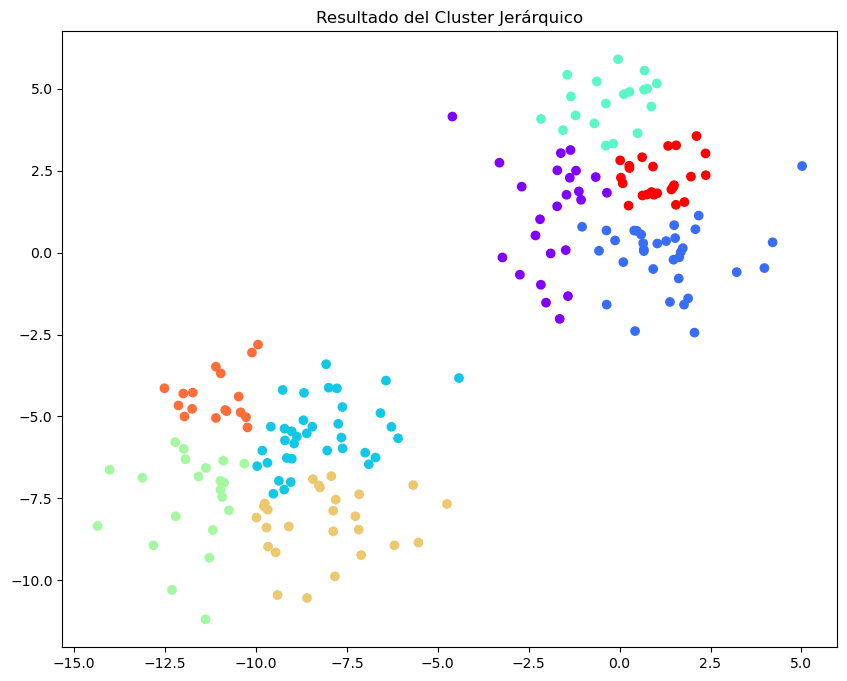

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.title('Resultado del Cluster Jerárquico')
plt.show()

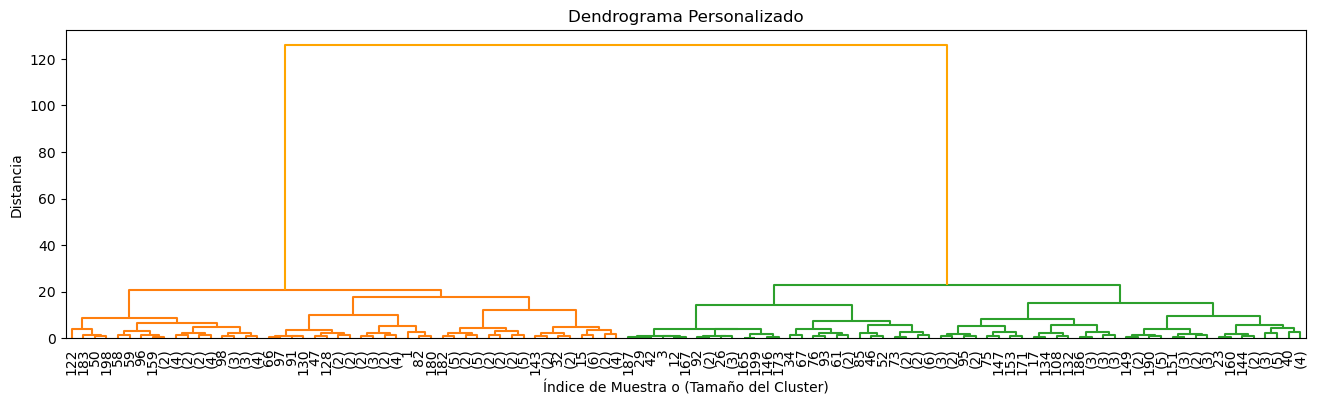

In [57]:
plt.figure(figsize=(16, 4))
dendrogram(
    Z,
    #truncate_mode='lastp',  # Mostrar solo los últimos p clusters combinados
    #truncate_mode= None,  # Muestra todo el dendrograma sin truncar
    truncate_mode='level',  # Mostrar solo los nodos hasta un nivel específico
    p=6,  # Limitar el dendrograma a 5 niveles
    leaf_rotation=90.,  # Rotar las etiquetas del eje x
    leaf_font_size=10.,  # Tamaño de fuente para las etiquetas del eje x
    show_contracted=True,  # Para obtener una impresión de distribución en ramas truncadas
    above_threshold_color='orange'  # Color para las ramas por encima del umbral
)
plt.title('Dendrograma Personalizado')
plt.xlabel('Índice de Muestra o (Tamaño del Cluster)')
plt.ylabel('Distancia')
plt.show()